**ФИО: Бочарова Дарья Алексеевна, Гарькина Анастасия Константиновна**



## Project


__Тема:__ Экология в разных странах мира за 2022 год

__Цель:__ Посмотреть на зависимость между экологической обстановкой и смертностью в странах мира за 2022 год

__Гипотеза:__ Страны с высоким индексом активно инвестируют в экологию своей территории. Стоит повышать государственные затраты на обеспечение устанения проблем с экологией, что позволит снизить уровень смертности граждан

## Сбор данных

На данном шаге мы будем создавать датасет; это будет происходить в несколько этапов, поскольку данные достаются с разных сайтов. Необходимы индекс экологической эффективности и уровень смертности в странах мира

In [70]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import urllib.request



Сначала берем данные об индексе экологической эффективности

Источник: https://epi.yale.edu/epi-results/2022/component/epi

In [71]:
url = "https://epi.yale.edu/epi-results/2022/component/epi" #первый источник с индексами
response = requests.get(url)
print(response) #результат 200, можно работать 

bs = BeautifulSoup(response.text, "lxml") #получаем исходный код
data = []

table1 = bs.find('table', class_="epi-tlarecord-countryrows") #достаем из исходного кода нужные данные
rows = table1.find_all('tr')

for row in rows[1:]:  # пропускаем первую строку, чтобы убрать заголовки столбцов
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

data = pd.DataFrame(data, columns=['Country', 'Rank', 'Index', 'Ten_year_change'])


data.drop('Rank', axis=1, inplace=True) #удаляем столбец с номерами стран 

data_sorted = data.sort_values(by='Country') #отсортируем данные так, чтобы страны шли в алфавитном порядке, это нужно для облегчения процесса  дальнейшего сведения таблиц

data_sorted = data_sorted.sort_values(by='Country', ignore_index=True) #отсортируем данные по столбцу 'Country' с игнорированием нумерации
print(data_sorted.shape)
data_sorted.head()


<Response [200]>
(180, 3)


,Country,Index,Ten_year_change
0,Afghanistan,43.60,23.90
1,Albania,47.10,9.90
2,Algeria,29.60,-4.00
3,Angola,30.50,0.20
4,Antigua and Barbuda,52.40,9.70


__Описание столбцов:__

* `Country` -  название страны
* `Index` - уровень экологии
* `ten_year_change` - изменения за последние 10 лет




Теперь достаем данные о ежегодной смертности людей в разных странах мира

Источник: https://database.earth/population/deaths/2022

In [72]:
url = "https://database.earth/population/deaths/2022" 
response = requests.get(url)
print(response) #результат 200, можно работать 

bs = BeautifulSoup(response.text, "lxml") #получаем исходный код
data = []

table1 = bs.find('table', class_="table-fixed w-full") #достаем из исходного кода нужные данные
rows = table1.find_all('tr')

for row in rows[1:]:  # пропускаем первую строку, чтобы убрать заголовки столбцов
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

data = pd.DataFrame(data, columns=['Rank', 'Country', 'Annual_Deaths', 'Male_Deaths', 'Female_Deaths'])


data.drop('Rank', axis=1, inplace=True) #удаляем столбец с номерами стран

data_sorted1 = data.sort_values(by='Country') #отсортируем данные так, чтобы страны шли в алфавитном порядке, это нужно для облегчения процесса  дальнейшего сведения таблиц

data_sorted1 = data_sorted1.sort_values(by='Country', ignore_index=True) #отсортируем данные по столбцу 'Country' с игнорированием нумерации

data_sorted1['Country'] = data_sorted1['Country'].str.replace(r'[^\x00-\x7F]+', '', regex=True) # убираем флаги с помощью этой страшной штуки, так как те символы не ASCII, подводка к gpt аналогична 



data_sorted1.head()

<Response [200]>


,Country,Annual_Deaths,Male_Deaths,Female_Deaths
0,Andorra,502,279,224
1,United Arab Emirates,"17,609","11,993","5,616"
2,Afghanistan,"284,297","163,410","120,887"
3,Antigua and Barbuda,571,293,278
4,Anguilla,103,64,38


__Описание столбцов:__

* `Country` -  название страны
* `Annual_Deaths` - ежегодная смертность населения
* `Мале_Deaths` - ежегодная смертность населения представителей мужского пола
* `Femале_Deaths` - ежегодная смертность населения представителей женского пола

Численность населения в каждой стране разная, поэтому нет смысла сравнивать, например, маленькую по площади страну с большой - в любом случае у второй смертность будет больше

Поэтому стоит добавить еще и данные по численности населения

Источник: https://database.earth/population/by-country/2022

In [73]:
url = "https://database.earth/population/by-country/2022"
response = requests.get(url) 
print(response) #результат 200, можно работать 

bs = BeautifulSoup(response.text, "lxml") #получаем исходный код
data = []

table1 = bs.find('table', class_="table-fixed w-full") #достаем из исходного кода нужные данные
rows = table1.find_all('tr')

for row in rows[1:]:  # пропускаем первую строку, чтобы убрать заголовки столбцов
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

data = pd.DataFrame(data, columns=['Country', 'Population', 'Overall Population Change +/-'])


data.drop('Overall Population Change +/-', axis=1, inplace=True) #удаляем столбец с изменениями численности населения



data_sorted2 = data.sort_values(by='Country') #отсортируем данные так, чтобы страны шли в алфавитном порядке, это нужно для облегчения процесса  дальнейшего сведения таблиц

data_sorted2 = data_sorted2.sort_values(by='Country', ignore_index=True) #отсортируем данные по столбцу 'Country' с игнорированием нумерации

data_sorted2['Country'] = data_sorted2['Country'].str.replace(r'[^\x00-\x7F]+', '', regex=True) # убираем флаги с помощью этой страшной штуки, так как те символы не ASCII, подводка к gpt аналогична

data_sorted2.head()

<Response [200]>


,Country,Population
0,Andorra,"79,824"
1,United Arab Emirates,"9,441,128"
2,Afghanistan,"41,128,771"
3,Antigua and Barbuda,"93,763"
4,Anguilla,"15,857"


__Описание столбцов:__

* `Country` -  название страны
* `Population` - численность населения в стране


Теперь сведем две последние таблицы и посмотрим на ее размерность

In [74]:
merged_df = pd.merge(data_sorted1, data_sorted2, on='Country', how='inner')

merged_df.head()


,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population
0,Andorra,502,279,224,"79,824"
1,United Arab Emirates,"17,609","11,993","5,616","9,441,128"
2,Afghanistan,"284,297","163,410","120,887","41,128,771"
3,Antigua and Barbuda,571,293,278,"93,763"
4,Anguilla,103,64,38,"15,857"


In [75]:
merged_df.shape

(237, 5)

Первая таблица намного меньше второй объединенной, однако их все равно надо "склеить" по Country

In [76]:
merged_df2 = pd.merge(merged_df, data_sorted, on='Country', how='left')

merged_df2.head()

,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
0,Andorra,502,279,224,"79,824",NaN,NaN
1,United Arab Emirates,"17,609","11,993","5,616","9,441,128",52.40,15.90
2,Afghanistan,"284,297","163,410","120,887","41,128,771",43.60,23.90
3,Antigua and Barbuda,571,293,278,"93,763",52.40,9.70
4,Anguilla,103,64,38,"15,857",NaN,NaN


In [77]:
merged_df.shape

(237, 5)


Датасет готов, можно приступать к следующему шагу

##  Предварительная обработка



На данном этапе будет выполнен анализ полученного датасета

Для начала проверим, есть ли в текущих данных пропуски и отсортируем их (при наличии)

In [78]:
merged_df2.isnull().sum().sort_values(ascending=False)

Index              72
Ten_year_change    72
Country             0
Annual_Deaths       0
Male_Deaths         0
Female_Deaths       0
Population          0
dtype: int64

Как видим, пропусков достаточно много. Это связано с тем, что в первом источнике стран меньше, чем во втором и третьем: некоторые совпадают, а некоторые вовсе отсутствуют в первой таблице. При этом мы считаем неправильным заменять эти значения на что-то нейтральное, поскольку тогда может сильно исказиться визуализация: у небольших по численности населения стран будут "средние" по величине показатели индексов. Поэтому выбросим строки, в которых значения пропущены (по сути это страны из 2 и 3 источников, которые не были обнаружены в 1 источнике). 



In [79]:
df_new = merged_df2.dropna()


df_new.head()

,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
1,United Arab Emirates,"17,609","11,993","5,616","9,441,128",52.40,15.90
2,Afghanistan,"284,297","163,410","120,887","41,128,771",43.60,23.90
3,Antigua and Barbuda,571,293,278,"93,763",52.40,9.70
5,Albania,"31,863","18,601","13,261","2,842,321",47.10,9.90
6,Armenia,"33,059","17,541","15,518","2,780,469",48.30,4.80


In [80]:
df_new.shape

(165, 7)

Выборка сильно уменьшилась (с 237 элементов до 165), это, опять же, произошло из-за того, что не все страны из 1 источника совпадали со 2 и 3 и наоборот. Однако сейчас в датасете нет пропусков вовсе, с такими данными удобно работать. Теперь уберем запятые в первых четырех числовых столбцах в таблице.

In [81]:
df = df_new.replace(',', '', regex=True)

df.head()

,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
1,United Arab Emirates,17609,11993,5616,9441128,52.40,15.90
2,Afghanistan,284297,163410,120887,41128771,43.60,23.90
3,Antigua and Barbuda,571,293,278,93763,52.40,9.70
5,Albania,31863,18601,13261,2842321,47.10,9.90
6,Armenia,33059,17541,15518,2780469,48.30,4.80


Именно с этим датасетом мы будем работать в следующем шаге

А пока отсортируем старую таблицу по столбцу Population в порядке возрастания и посмотрим на значения индекса экологической эффективности (десятилетний период нас пока не интересует)

Зачем это делается: нам хочется посмотреть, какие именно данные были выброшены.

In [82]:
prev_df = merged_df2.replace(',', '', regex=True)

prev_df['Population'] = prev_df['Population'].astype(int)

df_population = prev_df.sort_values(by='Population', ignore_index=True)

df_population.head(30)




,Country,Annual_Deaths,Male_Deaths,Female_Deaths,Population,Index,Ten_year_change
0,Holy See,10,5,5,510,NaN,NaN
1,Tokelau,14,6,7,1871,NaN,NaN
2,Niue,27,12,14,1934,NaN,NaN
3,Falkland Islands (Malvinas),27,15,12,3780,NaN,NaN
4,Montserrat,50,30,20,4390,NaN,NaN
5,Saint Helena,96,59,37,5374,NaN,NaN
6,Saint Pierre and Miquelon,71,38,33,5862,NaN,NaN
7,Saint Barthlemy,61,34,27,10967,NaN,NaN
8,Tuvalu,115,68,46,11312,NaN,NaN
9,Wallis and Futuna Islands,77,40,37,11572,NaN,NaN


Вывод здесь таков: из таблицы были выброшены в основном те страны, которые можно отнести к самым маленьким по численности населения. Это неплохо, поскольку у таких стран также небольшая и смертность в сравнении с другими, что очевидно. Адекватно оценить это со средними или медианным значениями в пропусках было бы нереальной задачей. Итог бы получился таким: страны с серединным значением индекса имеют низкую смертность за год, значит, они хорошо поддерживают уровень экологии. Но этот результат был бы получен без учета численности населения. 

Поэтому выбросы быил сделаны не зря.

##  EDA и визуализация

Найдем максимальное и минимальное значения столбца с индексами, а также их медиану

In [83]:
print(f" Максимальное значение индекса экологической эффективности: {df['Index'].max()}")
print(f" Минимальное значение индекса экологической эффективности: {df['Index'].min()}")
print(f" Медианное значение индекса экологической эффективности: {df['Index'].median()}")

 Максимальное значение индекса экологической эффективности: 77.90
 Минимальное значение индекса экологической эффективности: 18.90
 Медианное значение индекса экологической эффективности: 42.4


Попробуем разбить страны на две большие группы: с индексом от минимального до медианного и с индексом от медианного до максимального, а далее визулизировать распреление женской и мужской смертности в таких странах.


<Figure size 1200x600 with 0 Axes>

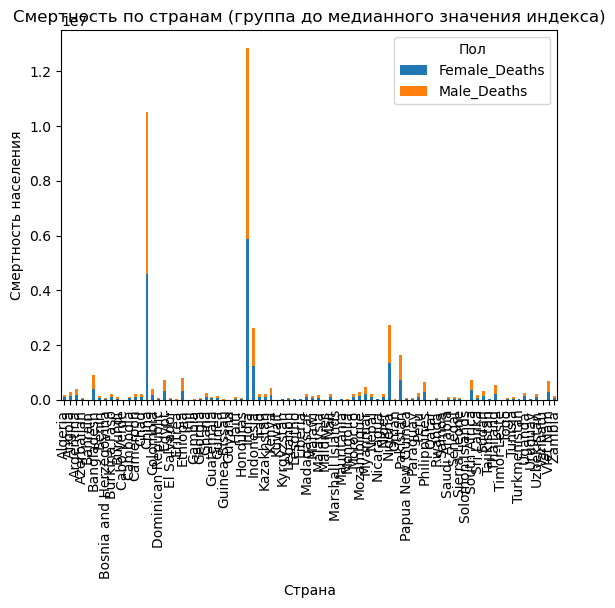

<Figure size 1200x600 with 0 Axes>

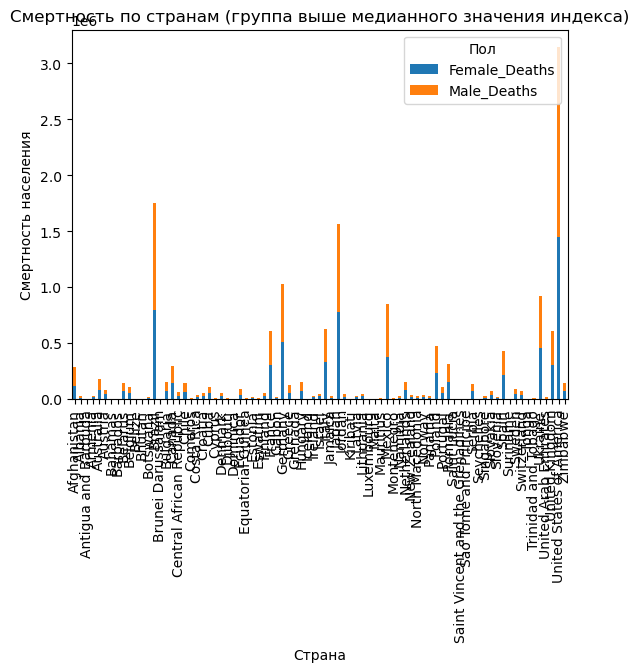

In [84]:
df['Index'] = pd.to_numeric(df['Index'], errors='coerce')
df['Female_Deaths'] = pd.to_numeric(df['Female_Deaths'], errors='coerce')
df['Male_Deaths'] = pd.to_numeric(df['Male_Deaths'], errors='coerce')


median_index = df['Index'].median()

df_low_index = df[df['Index'] <= median_index]
df_high_index = df[df['Index'] > median_index]

import matplotlib.pyplot as plt


df_low_grouped = df_low_index.groupby('Country')[['Female_Deaths', 'Male_Deaths']].sum()
df_high_grouped = df_high_index.groupby('Country')[['Female_Deaths', 'Male_Deaths']].sum()

# построим столбчатую диаграмму для первой группы (до медианного значения индекса включительно)
plt.figure(figsize=(12, 6))
df_low_grouped.plot(kind='bar', stacked=True)
plt.title('Смертность по странам (группа до медианного значения индекса)')
plt.xlabel('Страна')
plt.ylabel('Смертность населения')
plt.legend(title='Пол', loc='upper right')
plt.show()

# построим столбчатую диаграмму для второй группы (выше медианного значения индекса)
plt.figure(figsize=(12, 6))
df_high_grouped.plot(kind='bar', stacked=True)
plt.title('Смертность по странам (группа выше медианного значения индекса)')
plt.xlabel('Страна')
plt.ylabel('Смертность населения')
plt.legend(title='Пол', loc='upper right')
plt.show()



Отсюда можно заметить, что в государствах с показателем уровня экологической эффективности ниже/равному его медианному значению, смертность (что мужская, что женская) выше, чем в государствах с высоким показателем индекса (выше медианного). Интуитивно: страны, правительства которых активно работают над экологической средой своей территории, снижают уровень заболеваемости из-за загрязнения у граждан, тем самым уменьшая уровень смертности.

Попробуем проследить зависимость между численностью населения и индексом экологической эффективности на точечном графике.

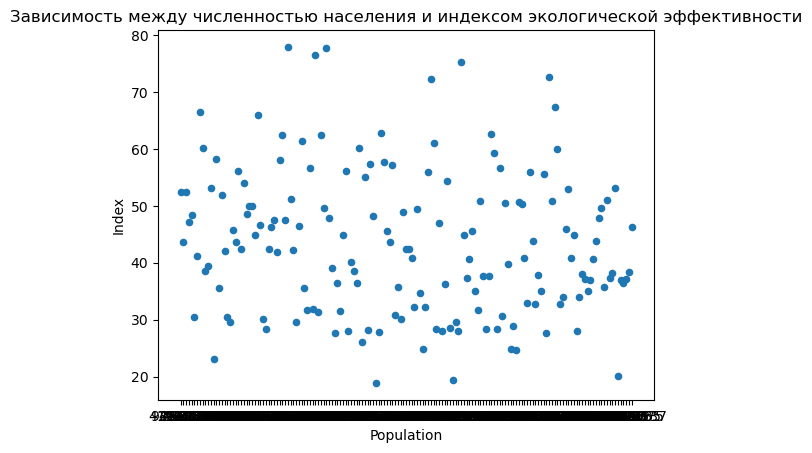

In [85]:
import matplotlib.pyplot as plt

df.plot(x='Population', y='Index', kind='scatter')

plt.xlabel('Population')
plt.ylabel('Index')
plt.title('Зависимость между численностью населения и индексом экологической эффективности')  

plt.show() 

На этом графике не наблюдается прямая зависимость: образовалось корреляционное облако.


Итоговый вывод, который можно здесь сделать: смертность действительно уменьшается с увеличением индекса экологической эффективности. При этом количество проживающих граждан не влияет на интенсивность участия государства в экологической безопасности.

##  Гипотезы 



Уровень смертности, конечно, зависит не только от экологии, но это является, на наш взгляд, одним из самых решающих факторов. Также кажется, что при должном интересе поддерживать экологию с помощью финансирования со стороны правительства, уровень экологии может повышаться. 

Нулевая гипотеза: страны, которые активно инвестируют в экологию (то есть стараются обеспечить чистую среду), имеют высокие показатели (являются "экологически чистыми"). 

Альтернативная гипотеза: страны, которые активно инвестируют в экологию, не обязательно имеют высокие показатели "экологической чистоты" (также низкие и средние).

Трудность, с которой мы сталкнулись: невозможно найти данные о зеленых инвестициях: их либо нет в желаемом формате по представленным выше странам, либо информация не раскрывается. 

Поэтому другой вариант гипотез, исходя из нашего графика: 

H0: страны с большой численностью населения относятся к экологически развитым (имеют высокий индекс)

H1: существует отрицательная корреляция между численностью населения страны и ее экологическим индексом, что означает, что страны с большой численностью населения склонны иметь более низкий экологический индекс.


In [86]:
import pandas as pd
from scipy.stats import pearsonr


#преобразуем в числовой формат (без этой строчки код не работал)
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['Index'] = pd.to_numeric(df['Index'], errors='coerce')



#находим коэффициент корреляции Пирсона и p-value
correlation, p_value = pearsonr(df['Population'], df['Index'])

print(f"Коэффициент корреляции Пирсона: {correlation}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует отрицательная корреляция между численностью населения и экологическим индексом.")
else:
    print("Не можем отвергнуть нулевую гипотезу: страны с большой численностью населения могут быть экологически развитыми.")


Коэффициент корреляции Пирсона: -0.22743156042568086
p-value: 0.003305495483096391
Отвергаем нулевую гипотезу: существует отрицательная корреляция между численностью населения и экологическим индексом.


Как и предполагалось еще из графика, однозначной зависимости между численностью населения и индексом экологической эффективности нет. Корреляция отрицательная, но она не является очень большой, поэтому заявлять о том, что чем больше людей в государстве, тем ниже индекс - также нельзя.

##  МО 



Мы хотим обучить модель предсказывать, сколько нужно использовать "зеленых" инвестиций, чтобы снизить уровень загрязнения и, соответственно, смертности (гипотеза представлена в самом начале). 

Проблема с данными та же, что и в разделе "Гипотезы". 

**Но теоретически план был таков:**

1) Добавляем данные об объеме инвестирования страны в экологию

2) Смотрим на соотношение инвестиций со смертностью и индексом экологии

3) Обучаем модель так, чтобы она предсказывала, сколько нужно вкладывать в экологию своей страны, чтобы уменьшить уровень смертности
